# DX 601 Week 7 Homework

## Introduction

In this homework, you will continue your practice working with random variables and expanding your focus to consider multiple variables at once.

The focus on these problems is on your understanding of the math, not the programming. Some of the data sets will be small enough that you can look at the data and calculate the answer in your head. That is acceptable, though we encourage you to also think about how to write code to perform the same calculation for you. We will work with larger data sets and provide more code examples for you as this class progress.

## Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Problems

### Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [1]:
import math
import random

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

### Problem 1

Suppose you are playing a slot machine with 50% probability in a single play.
You just started playing and won 10 times in a row.
Set `p1` to be the expected percentage of wins if you play 90 more times.
To be clear, `p1` should be calculated over all 100 times.

In [3]:
# YOUR CHANGES HERE

# we want to find the probability of winning when playing 100 times
# currently we've won 10 times in a row

current_wins = 10
expected_wins = 90 * 0.5

p1 = (current_wins + expected_wins)/100

In [4]:
p1

0.55

### Problem 2

Suppose you are playing a slot machine with 10% probablity to win.
You just started playing and won 20 out of 100 times, so your cumulative win rate is 20% now.
Set `p2` to be the number of additional times playing so that your cumulative win rate is expected to be 11% or less.

In [8]:
# YOUR CHANGES HERE

# won 20/100 so current cum win rate is 0.2
# .10 prob of winning
# at what point do we hit <= .11 for cum win rate

cum_win_dict = {0: 0.2}
times_played = 100

for i in range(1, 1001):
    times_played += 1
    new_cum_win = (20 + (0.1 * i)) / times_played
    cum_win_dict[i] = new_cum_win
    if new_cum_win <= 0.11:
        print(f"cum win is less than or equal to 0.11 at {i} times played")
        break

p2 = list(cum_win_dict.keys())[-1]
print(p2)

cum win is less than or equal to 0.11 at 900 times played
900


In [ ]:
p2

### Problem 3

Suppose that you are studying a newly discovered species of ants, and are studying the growth of the territory where they forage.
Across multiple hives, you observe that the radius of their territory grows by approximately 1cm per day with a standard deviation of 0.5cm.
Over a period of 90 days, you expect 90cm increase in the radius of a hive's territory.
Set `p3` to be the standard deviation in cm of that increase.
You may assume that 90 days is sufficient to use the asymptotic behavior of the Central Limit Theorem.


In [9]:
# YOUR CHANGES HERE

# n = total number samples = 90 days
# u = mean of one sample = 1cm
# o = std of one sample = 0.5cm
#
# std total growth = root(n) * std

n = 90
o = 0.5

p3 = math.sqrt(n) * o

In [10]:
p3

4.743416490252569

### Problem 4

You are studying the growth of small dogs.
In your data set, you note that the average growth from one to two months old is one pound with a standard deviation of half a pound.
From two months old to four months old, the average growth is one and a half pounds with a standard deviation of half a pound again.
Both distributions appear normal and you assume the growth in those two periods is independent.
Set `p4` to the standard deviation of the growth from one month to four months old assuming those distribution assumptions are true.

Hint: the Central Limit Theorem is not appropriate to reason about adding just two variables.
Week 6 covered sums of random variables.

In [110]:
# YOUR CHANGES HERE

# one month to two month, std = 0.5lb, mean is 1lb
# two month to four month, std = 0.5lb, mean is 1.5lb
# independent
# Var(X + Y) = Var(X) + Var(Y)

p4 = math.sqrt((.5**2) + (0.5**2))

In [111]:
p4

0.7071067811865476

### Problem 5

While continuing your studies of the growth of small dogs, you notice that the standard deviation and variance of growth from one to four months is actually higher than you previously calculated.
Like before, your data still supports an average growth from one to two months old of one pound with a standard deviation of half a pound, and an average growth from two to four months old of one and a half pounts with a standard deviation of half a pound again.
However, you calculate the standard deviation of the growth from one to four months old, and get 0.75 which is higher than you previously calculated.
The distributions still look normal, so you assume that the independence assumption was incorrect.
Set `p5` to the correlation between the two periods of growth.

Hint: the Central Limit Theorem is not appropriate again, but sums of correlated normally distributed variables were covered in week 6.

In [23]:
# YOUR CHANGES HERE

# one month to two month, std = 0.5lb, mean is 1lb
# two month to four month, std = 0.5lb, mean is 1.5lb
# dependent
# Var(X + Y) = Var(X) + Var(Y) + 2p(root(Var(X)*Var(Y)))

# variance = 0.5**2
# 0.5625 = variance + variance + 2*x*(root(variance * variance))
# 0.5625 = 0.5 + 2*x*0.25
# 0.5625 = 0.5 + 0.5*x
# 0.0625 = 0.5*x
# 0.125 = x

p5 = 0.125

In [24]:
p5

0.125

### Problem 6

You are running an experiment and one of your measurement devices is damaged.
After repairs, you are concerned that the device is not calibrated properly, so you take a new sample `s6` and compare it to your previous data stored in `q6`.
Set `p6` to the cdf at `s6` using the sample distribution of `q6`.

In [25]:
# DO NOT CHANGE

q6 = np.array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
       6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
       6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
       7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
       7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
       7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
       6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
       3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
       7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
       4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
       5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
       6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
       5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
       7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
       4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618734,
       5.8507972 , 7.30433857, 4.26087762, 5.50748049, 5.31339463,
       4.33992787, 6.44657891, 6.29622774, 4.81904013, 6.65312179,
       7.4858895 , 4.54967638, 4.70464419, 5.29373718, 6.83796865,
       6.39806464, 8.06565846, 7.36787739, 7.0795772 , 5.98787754,
       6.40424913, 6.3692323 , 6.6040807 , 5.7100411 , 5.09037487])
q6

array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
       6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
       6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
       7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
       7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
       7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
       6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
       3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
       7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
       4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
       5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
       6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
       5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
       7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
       4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618

In [26]:
# DO NOT CHANGE

s6 = 5.3

In [27]:
# YOUR CHANGES HERE

def get_cdf_value(sample_distribution, new_sample):
    count_less_than_or_equal_to = np.sum(sample_distribution < new_sample)
    cdf_value = count_less_than_or_equal_to / len(sample_distribution)
    return cdf_value

p6 = get_cdf_value(q6, s6)

In [28]:
p6

np.float64(0.31)

### Problem 7

The data that you have been studying is distributed normally with mean 5.4 and standard deviation 1.6.
A new sample from a different population has value 3.5.
Set `p7` to the z-score of the sample with respect to the stated distribution.

In [29]:
# YOUR CHANGES HERE

z = (3.5 - 5.4)/1.6

p7 = z

In [30]:
p7

-1.1875000000000002

### Problem 8

Another data set that you have been studying is distributed normally with mean 4.6 and standard deviation 1.2.
A colleague brings you a sample from another source that she worries is from a different distribution with lower values.
The value from her sample was 2.3.
Set `p8` to the p-value of that sample.

Hint: the [SciPy statistical functions](https://docs.scipy.org/doc/scipy/reference/stats.html) mentioned in week 5 may be useful for the p-value calculation.

In [115]:
# YOUR CHANGES HERE
import scipy.stats as stats

z = (2.3-4.6)/1.2

p8 = stats.norm.sf(abs(z))

In [116]:
p8

np.float64(0.027640146293010405)

### Problem 9

The data in `x9` and `y9` were both drawn from normal distributions.
Set `p9` to be `True` if they are independent and `False` otherwise.

In [35]:
# DO NOT CHANGE

x9 = np.array([1.76022533, 2.93794286, 2.8113691 , 4.24084674, 2.67978959,
       6.31469587, 1.70379605, 5.5219684 , 2.67958439, 3.27295481,
       3.47185209, 5.35432169, 5.42605015, 3.92734629, 3.66104063,
       4.21505185, 3.22403572, 4.05807046, 3.45323518, 5.16856412,
       4.16791383, 3.9309099 , 2.59989164, 3.76082607, 4.09722323,
       5.38456304, 3.29881105, 4.22101537, 3.16077268, 3.89421001,
       4.08093598, 5.93319428, 4.50490768, 4.83169143, 6.08890204,
       6.52442839, 4.11790124, 3.44746229, 3.50077545, 4.79288277,
       6.86829007, 3.58505842, 3.45982513, 3.39173625, 5.2701723 ,
       5.04089672, 3.70895369, 3.21694605, 5.69903496, 3.33365058,
       6.0521787 , 5.19811488, 6.84592422, 3.30379982, 4.83849873,
       3.25459293, 3.20679304, 6.35362698, 4.67598552, 3.57733236,
       2.3097549 , 5.05582515, 4.15172262, 3.91849816, 3.99517974,
       3.76024405, 4.83981276, 5.0502631 , 4.0135239 , 5.13624717,
       3.86903052, 2.24865256, 2.94009614, 2.89585587, 5.0480086 ,
       3.19184078, 4.68894534, 3.00959187, 3.828437  , 4.85726538,
       4.5878141 , 4.21384494, 4.25147   , 3.34810139, 3.67226579,
       3.42690057, 2.7412011 , 5.27073314, 1.72678637, 1.86986076,
       3.1413699 , 4.22984349, 4.26338851, 1.55526408, 2.72188336,
       2.10495717, 3.26691049, 5.61847964, 3.70835577, 4.17787853])

In [36]:
# DO NOT CHANGE

y9 = np.array([1.59802707, 1.65638831, 1.69389145, 1.73320057, 2.27057215,
       2.26773727, 0.74786123, 1.95583344, 1.60531634, 1.82903317,
       1.94911895, 2.66570869, 2.11433793, 2.00479899, 1.14481541,
       1.76667755, 1.87143993, 2.47284106, 2.03846468, 2.48370135,
       1.50786894, 1.76957673, 1.60417906, 2.66040099, 2.26759103,
       2.22707691, 1.53390989, 1.71188286, 2.01073471, 1.99884568,
       1.50917252, 2.84038321, 2.49600399, 2.43999836, 2.00503682,
       2.71747663, 2.43633517, 1.76123605, 2.15835925, 2.45210512,
       2.31571745, 2.28231249, 1.73709602, 2.27861069, 1.91330557,
       2.30317909, 2.02219126, 1.48742197, 2.33665505, 1.61544739,
       2.60128676, 2.2905018 , 2.51716928, 2.28750735, 2.22820756,
       1.52043853, 1.80504264, 2.49247987, 1.87039665, 1.53880808,
       2.02758668, 2.13228388, 1.9118948 , 2.32077125, 1.65373829,
       2.28192174, 2.01832556, 2.13332765, 1.79271539, 2.46307439,
       1.92617174, 1.78901828, 1.62210115, 1.34053538, 2.28518415,
       1.86798053, 1.91845887, 1.78612082, 2.19033811, 2.08703142,
       1.60511673, 1.79058535, 2.59917269, 1.57236333, 2.22827456,
       2.07065288, 1.10096927, 2.35949112, 1.41311036, 1.51559291,
       1.75612679, 2.25287521, 1.56027176, 1.01926126, 1.67806432,
       1.98284661, 1.5090704 , 2.4438849 , 1.41105619, 2.32883079])

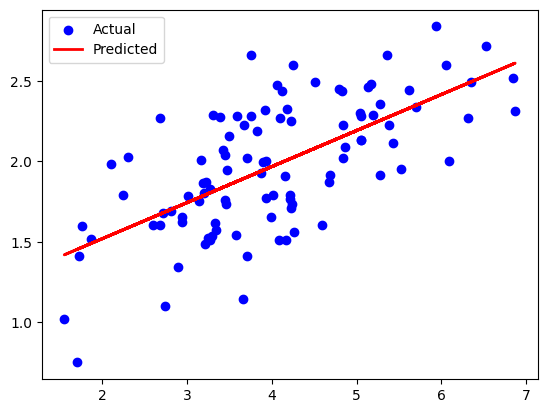

In [41]:
# YOUR CHANGES HERE
from sklearn.linear_model import LinearRegression

X = x9.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y9)
y_pred = model.predict(X)

plt.scatter(X, y9, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.legend()
plt.show()

p9 = False

In [42]:
p9

False

### Problem 10

Set `p10` to the average red value in the `q10` data set conditioned on the green value being at least 0.4.

Hint: use the [DataFrame query method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) to filter the data set.

In [43]:
# DO NOT CHANGE

q10 = pd.DataFrame({"red": [0.3746212 , 1.        , 0.52910346, 0.65975348, 0.98970283,
       0.5581262 , 0.94360295, 0.5448775 , 0.84912406, 0.44658483,
       1.        , 0.4958053 , 0.93356717, 0.2687507 , 1.        ,
       0.94779468, 0.22867779, 0.71051912, 0.85421186, 0.73399986,
       0.59593751, 1.        , 1.        , 0.51356477, 0.90511034,
       1.        , 0.19048949, 0.84377587, 0.4483424 , 1.        ,
       0.91256881, 0.39033419, 0.54883274, 0.2373084 , 1.        ,
       0.80920802, 0.21918692, 0.89027434, 0.73546877, 1.        ,
       0.38382227, 1.        , 0.72376547, 0.5225199 , 0.56885517,
       0.66976918, 0.73455374, 1.        , 0.68984014, 0.9720929 ,
       0.66374018, 0.53528603, 0.63125021, 1.        , 0.39310177,
       0.66610964, 0.70386728, 0.32677789, 0.61645108, 0.77741647,
       0.5912166 , 0.42359428, 0.54626866, 0.60771765, 0.35601226,
       1.        , 0.42685889, 0.40335105, 0.89857544, 0.56209774,
       0.57429061, 0.20665787, 0.46903142, 0.82183169, 0.30083743,
       0.6166462 , 0.5452483 , 0.66810117, 0.84652572, 0.70714273,
       0.44131121, 1.        , 0.08268519, 0.99619225, 0.63928165,
       0.23848664, 1.        , 0.51129006, 1.        , 0.77680075,
       0.69345814, 0.42668177, 0.55070542, 0.8753218 , 0.82953898,
       0.57393231, 0.71231297, 0.432083  , 0.94478494, 0.27342598],
       "green": [0.14920408, 0.68747619, 0.36352261, 0.29636053, 0.27384496,
       0.22896888, 0.67361327, 0.46800206, 0.44445459, 0.39320378,
       0.18881428, 0.59788019, 0.70187309, 0.14655468, 0.32744452,
       0.46975821, 0.51300921, 0.49520102, 0.40148912, 0.36322513,
       0.21014486, 0.38717443, 0.22184452, 0.093992  , 0.55314207,
       0.58139855, 0.22663676, 0.38636278, 0.62465522, 0.        ,
       0.39555956, 0.26072611, 0.29058224, 0.30989647, 0.46202296,
       0.36208922, 0.77716799, 0.5228047 , 0.67690533, 0.08589879,
       0.23325419, 0.42110331, 0.76167113, 0.27129737, 0.75127783,
       0.75885196, 0.18155961, 0.1829003 , 0.44536781, 0.26349848,
       0.34285905, 0.42158777, 0.38648716, 0.16906207, 0.24749229,
       0.78368894, 0.68164436, 0.2256094 , 0.42767822, 0.11590442,
       0.28872813, 0.324811  , 0.16748462, 0.11238756, 0.46495606,
       0.38567438, 0.44906867, 0.15682246, 0.49325074, 0.71546642,
       0.38962264, 0.55080152, 0.2510654 , 0.27091548, 0.28113115,
       0.36788924, 0.16573055, 0.7974529 , 0.14556548, 0.33344705,
       0.31681096, 0.49387162, 0.37433587, 0.3237266 , 0.66263795,
       0.33907066, 0.11031799, 0.31039299, 0.41789659, 0.67552801,
       0.24033477, 0.51003174, 0.57831101, 0.46007546, 0.3106257 ,
       0.61464828, 0.89363241, 0.40207848, 0.13278618, 0.0970784 ]})

In [47]:
# YOUR CHANGES HERE

filtered_df = q10.query("green >= 0.4")

p10 = filtered_df.mean()['red']

In [48]:
p10

np.float64(0.6901411959523809)

### Problem 11

Set `p11` to $\lim_{x \rightarrow 3} \frac{(x+3)(x-3)}{x-3}$.

In [119]:
# YOUR CHANGES HERE

# limit of x approaching 3 = x + 3
# 3 + 3 = 6

p11 = 6

In [120]:
p11

6

### Problem 12

Set `p12` to $\lim_{x \rightarrow \infty} \left( 3 + \frac{1}{x} \right)$.

In [49]:
# YOUR CHANGES HERE

def limit_of_x(x):
    return 3 + (1/x)

p12 = limit_of_x(math.inf)

In [50]:
p12

3.0

### Problem 13

You are given the following function `f13` computing a probability distribution.
Set `p13` to the standard deviation of the distribution.

Hint: This function is for a Gaussian (normal) distribution, so you just need to match up the function's formula with the standard formula to identify the parameters of the distribution.

In [51]:
# DO NOT CHANGE

# compute probability density function
def f13(x):
    return (1 / (3 * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - 4) / 3)**2)

In [52]:
# YOUR ANSWER HERE

p13 = 3

In [53]:
p13

3

### Problem 14

Examine the distribution of values in `q14`.
Set `p14` to "normal" if it appears to be a normal distribution, "uniform" if it appears to be a uniform distribution, and "unknown" if it appears to be neither.

Hint: plot a histogram.

In [121]:
# DO NOT CHANGE

q14 = [0.46261653, 0.56158988, 0.36701823, 0.47492479, 0.48778535,
       0.36491246, 0.59495086, 0.34430334, 0.37968959, 0.44636481,
       0.45648656, 0.32862019, 0.30859192, 0.57556291, 0.41520327,
       0.44420955, 0.30037534, 0.53709709, 0.5783395 , 0.35618589,
       0.31761864, 0.56255115, 0.33534815, 0.31121752, 0.50797474,
       0.55923288, 0.40161263, 0.51443647, 0.30634069, 0.40047642,
       0.54381048, 0.32350121, 0.33369876, 0.3727606 , 0.37963213,
       0.56410506, 0.51148684, 0.54625606, 0.56272629, 0.58562246,
       0.52086751, 0.36485698, 0.58876025, 0.42739113, 0.55452328,
       0.56743534, 0.3256431 , 0.36230136, 0.52707355, 0.51237036,
       0.39261796, 0.54726893, 0.33365859, 0.36264953, 0.52880359,
       0.4030899 , 0.53407826, 0.59811586, 0.41202469, 0.58049136,
       0.58801352, 0.35487242, 0.34066947, 0.35942823, 0.55162735,
       0.42085846, 0.56262792, 0.54436273, 0.49689845, 0.57423073,
       0.53360938, 0.56388   , 0.49920718, 0.31484825, 0.38587873,
       0.36896184, 0.55427025, 0.5521653 , 0.57470545, 0.53653929,
       0.54793893, 0.38016261, 0.43905917, 0.32765617, 0.56996915,
       0.52279882, 0.37869054, 0.57865518, 0.52050404, 0.46845801,
       0.59601391, 0.32369801, 0.48995414, 0.48426359, 0.4081597 ,
       0.44044288, 0.52093788, 0.54283014, 0.46821819, 0.35663956,
       0.39647951, 0.57355345, 0.58560909, 0.45995171, 0.46094043,
       0.55423857, 0.32559627, 0.37087574, 0.42113685, 0.30209967,
       0.47993177, 0.47991708, 0.34605345, 0.3460095 , 0.58494917,
       0.5284886 , 0.44287424, 0.44322685, 0.53542166, 0.51174559,
       0.3789067 , 0.37046059, 0.57114312, 0.3404944 , 0.38667558,
       0.46611747, 0.45416402, 0.57026999, 0.57240679, 0.48542983,
       0.49937555, 0.48051131, 0.42537138, 0.31782875, 0.57280937,
       0.57094269, 0.3457322 , 0.48226626, 0.5236014 , 0.34014164,
       0.38482192, 0.41654299, 0.52067924, 0.41425492, 0.37492125,
       0.41748008, 0.48674816, 0.40458577, 0.59747028, 0.57983917,
       0.40869749, 0.43499544, 0.40424466, 0.58691017, 0.40589129,
       0.50452565, 0.31619735, 0.34097511, 0.33028243, 0.5750322 ,
       0.39883972, 0.50716504, 0.36378801, 0.42248851, 0.47452691,
       0.30592074, 0.38482479, 0.41260852, 0.39692406, 0.50173964,
       0.49513404, 0.30262884, 0.52459992, 0.451786  , 0.34014082,
       0.37637891, 0.58176367, 0.32759691, 0.34775117, 0.55119143,
       0.52904956, 0.46463865, 0.46501375, 0.37897548, 0.59556109,
       0.54483039, 0.48855074, 0.51675203, 0.45853501, 0.486735  ,
       0.47624444, 0.53281128, 0.47509492, 0.33854626, 0.44304458,
       0.5910023 , 0.44556137, 0.41385052, 0.54824629, 0.49042098,
       0.43339065, 0.45083242, 0.48400733, 0.46974774, 0.49852108,
       0.49478689, 0.33755169, 0.42340283, 0.32344169, 0.48948005,
       0.57355837, 0.4284802 , 0.38984471, 0.41864356, 0.45836754,
       0.44796631, 0.52388219, 0.49497782, 0.52584808, 0.5133838 ,
       0.55743883, 0.45547962, 0.39348235, 0.52424787, 0.39559982,
       0.48642845, 0.3877452 , 0.33357593, 0.580174  , 0.41977846,
       0.38942044, 0.59871243, 0.51555964, 0.30434247, 0.43072141,
       0.46321176, 0.32438045, 0.31358942, 0.42370457, 0.59494352,
       0.35775195, 0.39849667, 0.3584663 , 0.37269062, 0.44081348,
       0.48269458, 0.36424405, 0.47727892, 0.5807361 , 0.36630686,
       0.41167539, 0.45264319, 0.51252713, 0.37401165, 0.34646664,
       0.34608128, 0.43903373, 0.39778866, 0.40090253, 0.55012168,
       0.42568846, 0.55194754, 0.33913317, 0.57431977, 0.34434012,
       0.37021532, 0.53408422, 0.50291076, 0.33646542, 0.39260505,
       0.50212033, 0.40908294, 0.34693566, 0.5946562 , 0.45400359,
       0.37318226, 0.32036098, 0.38141266, 0.30823736, 0.45752558,
       0.39614593, 0.53961725, 0.45251127, 0.35744342, 0.54140347,
       0.3072742 , 0.58072983, 0.53907504, 0.35898136, 0.46901516,
       0.55039351, 0.4456942 , 0.54308138, 0.35422637, 0.33914111,
       0.34543184, 0.40918516, 0.58650202, 0.55575222, 0.42908287,
       0.32400672, 0.59544528, 0.55380507, 0.35025556, 0.45071405,
       0.42520439, 0.54184303, 0.38930508, 0.39814591, 0.44163238,
       0.49137744, 0.44865564, 0.54424306, 0.59905845, 0.39189479,
       0.50562831, 0.49656412, 0.51524755, 0.5232859 , 0.55440712,
       0.56716134, 0.50726623, 0.43698893, 0.5860452 , 0.37588238,
       0.36356555, 0.51394136, 0.49395623, 0.3194193 , 0.59653533,
       0.40155935, 0.37601111, 0.55083533, 0.39390045, 0.34810115,
       0.4827714 , 0.34149485, 0.30212965, 0.38737973, 0.37039352,
       0.53565079, 0.44023687, 0.58845702, 0.3348877 , 0.54432172,
       0.51641006, 0.56069336, 0.48676445, 0.40924967, 0.54557643,
       0.47197506, 0.5163608 , 0.37953749, 0.43739435, 0.33473737,
       0.59351502, 0.55975311, 0.53404263, 0.52137872, 0.3894459 ,
       0.53514628, 0.46513527, 0.56626625, 0.46498731, 0.4215047 ,
       0.51307427, 0.59221675, 0.4202288 , 0.32736622, 0.52964636,
       0.39439979, 0.48934594, 0.44648197, 0.48547019, 0.3449669 ,
       0.44082959, 0.34239861, 0.41565485, 0.32102709, 0.52196282,
       0.48571016, 0.33628791, 0.48717224, 0.40868453, 0.39838545,
       0.54258018, 0.47978803, 0.44830771, 0.3715978 , 0.33460578,
       0.32318689, 0.51458301, 0.47845109, 0.45047502, 0.56511384,
       0.4561336 , 0.55786032, 0.51260115, 0.38498133, 0.32429596,
       0.54732653, 0.58534995, 0.38060932, 0.54139808, 0.4736776 ,
       0.45191957, 0.42701216, 0.39762305, 0.44904439, 0.58761053,
       0.37734809, 0.32827188, 0.34879271, 0.32053178, 0.54942012,
       0.35272126, 0.37942158, 0.36544418, 0.49728404, 0.59680802,
       0.32212993, 0.3555613 , 0.48528177, 0.47195306, 0.57374072,
       0.51676084, 0.56833072, 0.59901539, 0.39929025, 0.47580342,
       0.45219901, 0.3844967 , 0.53478497, 0.44848383, 0.51379747,
       0.47040913, 0.59934522, 0.35631589, 0.48488867, 0.42686216,
       0.57538911, 0.34008798, 0.38760463, 0.32534247, 0.44251367,
       0.56993889, 0.33219675, 0.36481229, 0.30896674, 0.41180003,
       0.30747329, 0.34977359, 0.42632956, 0.40263396, 0.4151499 ,
       0.49995383, 0.55487847, 0.48327478, 0.45092052, 0.47824386,
       0.56001287, 0.4000831 , 0.48208364, 0.54113828, 0.37388852,
       0.40997912, 0.36150249, 0.48115318, 0.34492312, 0.55453851,
       0.33620894, 0.37962264, 0.3042962 , 0.38142322, 0.58232505,
       0.41439099, 0.37114019, 0.42553048, 0.3231676 , 0.52851303,
       0.34510179, 0.34798655, 0.39106298, 0.5678138 , 0.31860894,
       0.38746173, 0.41843812, 0.51488808, 0.48571741, 0.48812847,
       0.35461111, 0.30164981, 0.42231072, 0.5336776 , 0.47317481,
       0.57897281, 0.48799338, 0.46574852, 0.39738548, 0.3006312 ,
       0.5472068 , 0.54414491, 0.30157914, 0.33525002, 0.3922342 ,
       0.36047379, 0.57109911, 0.42778149, 0.58185019, 0.37915841,
       0.43464001, 0.4147917 , 0.46102813, 0.35405287, 0.38640654,
       0.51941982, 0.59890648, 0.39959928, 0.54849123, 0.30419098,
       0.42931223, 0.56472874, 0.30653113, 0.52878272, 0.55694562,
       0.33959696, 0.30374458, 0.39004327, 0.31729366, 0.44826373,
       0.58629195, 0.55789833, 0.58010311, 0.43303593, 0.56000294,
       0.47047557, 0.45773069, 0.45337197, 0.55127383, 0.39893836,
       0.33778385, 0.49309883, 0.36320226, 0.38845922, 0.445397  ,
       0.35093769, 0.41421828, 0.32598829, 0.31629794, 0.54427973,
       0.41625639, 0.49826969, 0.45313412, 0.50269229, 0.49180081,
       0.45686678, 0.35192141, 0.53476075, 0.3631943 , 0.42137696,
       0.32621058, 0.30888593, 0.45674783, 0.4226039 , 0.40560958,
       0.48135966, 0.59784887, 0.40800773, 0.53460028, 0.54701741,
       0.3186769 , 0.34149726, 0.46157953, 0.30475697, 0.47224001,
       0.56375459, 0.39835264, 0.44320055, 0.59702066, 0.41777053,
       0.59630784, 0.36415996, 0.37692318, 0.32171538, 0.33138691,
       0.4940682 , 0.59988544, 0.33227865, 0.54736085, 0.50662877,
       0.35317565, 0.30372158, 0.30818902, 0.41039388, 0.52028484,
       0.53289524, 0.44805308, 0.34082463, 0.475698  , 0.50044679,
       0.37526933, 0.46744708, 0.47708078, 0.48983374, 0.43554229,
       0.53169754, 0.4160556 , 0.47195376, 0.37326698, 0.4883293 ,
       0.47947529, 0.36776405, 0.473618  , 0.46452462, 0.36470461,
       0.4786507 , 0.48913432, 0.57137255, 0.38815818, 0.50494286,
       0.45646194, 0.57200308, 0.32986161, 0.59432914, 0.38322877,
       0.39378661, 0.5726533 , 0.59666297, 0.35800934, 0.51904043,
       0.5473649 , 0.41541181, 0.35249204, 0.368465  , 0.38727193,
       0.34867765, 0.3742983 , 0.35350047, 0.45866284, 0.48258014,
       0.42523643, 0.48553796, 0.49171445, 0.55054995, 0.51706832,
       0.30049376, 0.57568752, 0.50999848, 0.41047253, 0.35443014,
       0.53889768, 0.33955855, 0.56691587, 0.42571696, 0.38532576,
       0.4819726 , 0.46248769, 0.37041731, 0.30141435, 0.39969504,
       0.58542309, 0.34327549, 0.36239234, 0.44714298, 0.44810086,
       0.49589849, 0.54877175, 0.4679545 , 0.46068978, 0.43661115,
       0.42949694, 0.46370926, 0.42419997, 0.57102423, 0.38490608,
       0.52378367, 0.50271403, 0.31595191, 0.38857587, 0.59987384,
       0.33703952, 0.47599428, 0.33670348, 0.38633433, 0.32302913,
       0.39427966, 0.51526206, 0.37741904, 0.36234748, 0.53519961,
       0.50858938, 0.30196459, 0.44898245, 0.34913686, 0.50352097,
       0.4193931 , 0.54903816, 0.40102463, 0.32110357, 0.52798436,
       0.3542639 , 0.47475511, 0.4449389 , 0.5766947 , 0.38957862,
       0.58864778, 0.39975213, 0.50503898, 0.32005933, 0.47227665,
       0.48923182, 0.57086402, 0.38055517, 0.44369604, 0.45937451,
       0.37003964, 0.38929375, 0.48318512, 0.36151623, 0.46942841,
       0.51519325, 0.47985635, 0.35731373, 0.50704927, 0.47650652,
       0.53993936, 0.37479653, 0.48806808, 0.57279537, 0.3541157 ,
       0.44209186, 0.49688111, 0.53050095, 0.52698636, 0.41849689,
       0.33760774, 0.43929345, 0.37822057, 0.42539595, 0.42553399,
       0.56546365, 0.41558821, 0.53225566, 0.56411141, 0.51361535,
       0.52257355, 0.52873499, 0.46183622, 0.45468878, 0.40709503,
       0.3775094 , 0.35314214, 0.35023329, 0.43244025, 0.53352878,
       0.47390036, 0.38838757, 0.35598025, 0.39155912, 0.33104263,
       0.55335107, 0.53601889, 0.55304818, 0.34998896, 0.45276262,
       0.53995225, 0.49010181, 0.3057858 , 0.49405742, 0.4405133 ,
       0.52318186, 0.46764804, 0.53648884, 0.33847291, 0.52844485,
       0.35976418, 0.41884591, 0.51540589, 0.33530548, 0.3058985 ,
       0.46485716, 0.45559077, 0.44896093, 0.47545822, 0.30174922,
       0.52432183, 0.46757472, 0.39895694, 0.46931648, 0.56958395,
       0.36192303, 0.5705829 , 0.31226367, 0.54847255, 0.5541772 ,
       0.51577165, 0.32967669, 0.45714964, 0.39138069, 0.41403526,
       0.39283037, 0.3743548 , 0.59738823, 0.3863768 , 0.37969717,
       0.48069543, 0.3055482 , 0.39955493, 0.30453269, 0.37258212,
       0.52818601, 0.37703005, 0.45040615, 0.34436235, 0.45359489,
       0.59347607, 0.49409294, 0.41751847, 0.39307312, 0.31053399,
       0.34481122, 0.50035739, 0.48584481, 0.46734437, 0.47791793,
       0.41312456, 0.56671912, 0.34193908, 0.58435098, 0.31113056,
       0.39848464, 0.32203692, 0.58090044, 0.47137729, 0.30180828,
       0.37889264, 0.3829345 , 0.41493061, 0.48805653, 0.59594125,
       0.30109397, 0.57896138, 0.56360803, 0.40868191, 0.48018676,
       0.5422812 , 0.41299167, 0.43553021, 0.51899091, 0.47742547,
       0.31306767, 0.46912552, 0.41496603, 0.57718283, 0.57625344,
       0.49387483, 0.51177263, 0.52250774, 0.39232761, 0.49747729,
       0.31778554, 0.48935173, 0.45516988, 0.49932326, 0.3214698 ,
       0.58369207, 0.44277716, 0.37138498, 0.52763855, 0.43686253,
       0.56989507, 0.3258901 , 0.45174794, 0.31246542, 0.39337326,
       0.35253101, 0.35245942, 0.42370236, 0.42673202, 0.43797692,
       0.45918938, 0.48388043, 0.41176875, 0.32364018, 0.51722125,
       0.44937899, 0.42624392, 0.59434992, 0.33167171, 0.33183114,
       0.36422761, 0.42410573, 0.55746348, 0.35264406, 0.36864259,
       0.458134  , 0.58728771, 0.38600868, 0.54472931, 0.40184004,
       0.44891921, 0.45308873, 0.53842724, 0.50626412, 0.40994324,
       0.5896633 , 0.31950395, 0.32996728, 0.45530008, 0.35060685,
       0.38810187, 0.52982276, 0.36090025, 0.34375425, 0.40891178,
       0.48819705, 0.44093273, 0.46856437, 0.31207713, 0.48549702,
       0.38945065, 0.31559621, 0.55812982, 0.48839342, 0.3037052 ,
       0.44106035, 0.43239559, 0.46572599, 0.47261714, 0.44316309,
       0.48782179, 0.45268634, 0.34365654, 0.49547805, 0.36294728,
       0.3659773 , 0.59301884, 0.30365658, 0.48594769, 0.49104946,
       0.38036874, 0.32393048, 0.43841581, 0.49763928, 0.51657643,
       0.58021612, 0.3698098 , 0.35729235, 0.41421584, 0.32133946,
       0.42113432, 0.4123551 , 0.45186219, 0.45020393, 0.51206798,
       0.47380906, 0.49884046, 0.50341024, 0.5257261 , 0.41631881,
       0.51845395, 0.48710971, 0.33190794, 0.40960227, 0.46082494,
       0.42678656, 0.36732807, 0.3466101 , 0.48817989, 0.51544535,
       0.33839567, 0.56562902, 0.57038894, 0.52799151, 0.42266673,
       0.5824632 , 0.41650692, 0.50934954, 0.40223745, 0.56750904,
       0.45298324, 0.44341696, 0.53265571, 0.44108194, 0.43645526,
       0.58389003, 0.3699935 , 0.34936999, 0.43478882, 0.4835979 ,
       0.34342969, 0.50245068, 0.45599469, 0.59609523, 0.33186012,
       0.44380014, 0.32972224, 0.54246385, 0.59193153, 0.47568438]

(array([ 93., 105., 111., 101.,  95., 112., 104.,  97.,  86.,  96.]),
 array([0.30037534, 0.33032635, 0.36027736, 0.39022837, 0.42017938,
        0.45013039, 0.4800814 , 0.51003241, 0.53998342, 0.56993443,
        0.59988544]),
 <BarContainer object of 10 artists>)

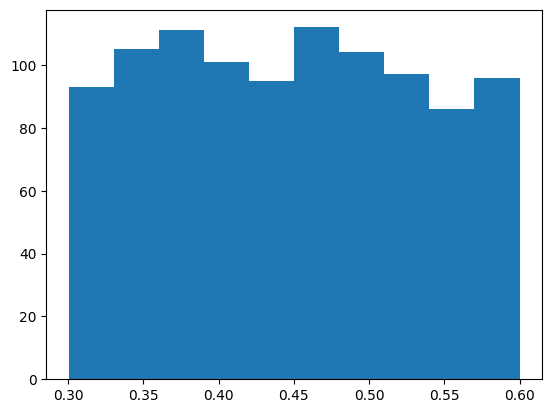

In [122]:
plt.hist(q14)

In [123]:
# YOUR CHANGES HERE

p14 = "uniform"

In [124]:
p14

'uniform'

### Problem 15

You are given a data set with 100 columns and asked to check each individual column have any significant effects.
You are instructed to keep the overall expected number of false positives at or below 0.5.
Set $\alpha$ value to the highest value that you could use when checking each of the 100 columns.

In [65]:
# YOUR CHANGES HERE

# p-value threshold

p15 = 0.5/100

In [66]:
p15

0.005

### Problem 16

Suppose you are observing a process where you measure a variable that is true with probability 1%.
Write code to simulate measuring this variable ten thousand times assuming that each measurement is independent from the others, and calculate the sample probability from the simulation.
Then repeat this simulation a thousand times and collect all of the sample probabilities.

* Set `p16a` to the 10th percentile of the sample probabilities.
* Set `p16b` to the 90th percentile of the sample probabilities.


Hint: similar experiments are described in Blackboard.

In [80]:
# YOUR CHANGES HERE

# run your simulations and save sample probabilities.
sample_probabilities = []
sample_run = []
for simulation_number in range(1000):
    # samples is an array of 10,000 true, false values with true having a 1% probability
    samples = np.random.rand(10000) < 0.01
    # since true = 1 and false = 0, np.mean will do count/len
    # np.mean([1, 0, 1, 0, 0, 1]) = 3/6 = 0.5
    sample_prob = np.mean(samples)
    sample_probabilities.append(sample_prob)

sample_probabilities = np.array(sample_probabilities)

[0.0099 0.0103 0.0107 0.0098 0.0112 0.0099 0.0097 0.0115 0.011  0.0097
 0.0101 0.0097 0.0097 0.0096 0.01   0.0097 0.0102 0.0098 0.0112 0.0089
 0.0098 0.0096 0.011  0.0096 0.0091 0.0083 0.0087 0.0092 0.0104 0.0087
 0.009  0.0109 0.009  0.011  0.0086 0.0092 0.0111 0.0108 0.009  0.0087
 0.0101 0.0087 0.0129 0.0092 0.0101 0.0082 0.0103 0.009  0.0124 0.0111
 0.0095 0.0087 0.0082 0.0116 0.0082 0.0113 0.0106 0.0103 0.0084 0.0081
 0.0108 0.0111 0.0099 0.0101 0.0111 0.0104 0.0086 0.0094 0.0113 0.0105
 0.0096 0.0104 0.009  0.0099 0.0095 0.0113 0.0113 0.01   0.0105 0.0096
 0.0095 0.0094 0.0109 0.0099 0.0102 0.0091 0.0105 0.0096 0.0091 0.0103
 0.0102 0.0095 0.0111 0.0111 0.0097 0.0082 0.0097 0.01   0.0103 0.0086
 0.0099 0.0112 0.011  0.0101 0.0094 0.0093 0.01   0.0106 0.0087 0.0092
 0.0098 0.0082 0.0096 0.0098 0.009  0.0099 0.0098 0.0081 0.0089 0.0081
 0.0091 0.0109 0.0098 0.0099 0.0081 0.0097 0.0096 0.011  0.0109 0.0103
 0.0082 0.009  0.0106 0.0084 0.0097 0.0093 0.0101 0.009  0.0113 0.0112
 0.010

In [76]:
# YOUR CHANGES HERE

# save the 10th percentile of the sample probabilities
# 10% of the sample probabilities (chance of getting a true value) lie at or below this value of p16a
p16a = np.percentile(sample_probabilities, 10)

In [77]:
p16a

np.float64(0.0087)

In [78]:
# YOUR CHANGES HERE

# save the 90th percentile of the sample probabilities
p16b = np.percentile(sample_probabilities, 90)

In [79]:
p16b

np.float64(0.0114)

### Problem 17

One way to estimate the mathematical constant $\pi$ is to pick $x$ and $y$ uniformly at random from -1 to 1 and check whether they lie in the unit circle (the circle of radius one centered at the origin).
This can be tested with the formula $x^2 + y^2 \leq 1$.
The probability that they lie in the unit circle is $\frac{\pi}{4}$.
The numerator is the area of the circle, $\pi r^2$, where the radius $r$ is one.
The denominator is the area of the square covering from -1 to 1 in the x and y dimensions.
Thus, an estimate for the probability that the sample point lies within the unit circle is an estimate for $\frac{\pi}{4}$, and multiplying the probability estimate by four gives an estimate for $\pi$.

Set `p17a` to be a list or array with one thousand samples that are `True` if $x$ and $y$ picked as above are in the unit circle and `False` otherwise.
Set `p17b` to be an estimate for $\pi$ computed from `p17a`.

In [101]:
# YOUR CODE HERE

# lie in unit circle = x**2 + y**2 <= 1
# probability they lie in circle is pie/4

x17 = np.random.uniform(-1, 1, size=1000)
y17 = np.random.uniform(-1, 1, size=1000)

def lie_in_circle(x, y):
    if x**2 + y**2 <= 1:
        return True
    else:
        return False

sample_run = []
for x, y in zip(x17, y17):
    sample_run.append(lie_in_circle(x, y))
p17a = sample_run

In [107]:
p17a

[True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

In [105]:
# YOUR CODE HERE
sample_prob = np.mean(p17a)

p17b = 4 * float(sample_prob)

In [106]:
p17b

3.072

### Problem 18

An average bread roll at the Big Data Cafe weighs 2oz.
A new baker was hired and we would like to check if their bread roll size is similar to before.
Use Student's one-sided $t$-test on the sample weights in `q18` to analyze the bread rolls.
Set `p18a` to the value of the $t$ statistic, and set `p18b` to True if it is statistically significant with $\alpha = 0.10$.

In [91]:
# DO NOT CHANGE

q18 = np.array([1.5, 2.1, 2.0, 1.9, 1.85, 2.25])

In [93]:
# YOUR CHANGES HERE

target_mean = 2
t_stat, p_value = stats.ttest_1samp(q18, target_mean)

p18a = t_stat

In [94]:
p18a

np.float64(-0.637252987877166)

In [96]:
# YOUR CHANGES HERE

# use 5% threshold on both sides
if p_value + 0.05 < 0.10 or p_value - 0.05 < 0.10:
    p18b = True
else:
    p18b = False

In [97]:
p18b

False

### Problem 19

While at lunch with a coworker, they mention a nagging feeling that something is not quite right with one of their models.
Later while passing their desk, you notice the ROC curves plotted below.
One of them catches your eye as needing immediate debugging.

Set `p19` to "a", "b", "c", or "d" to indicate the model in need of urgent fixes.

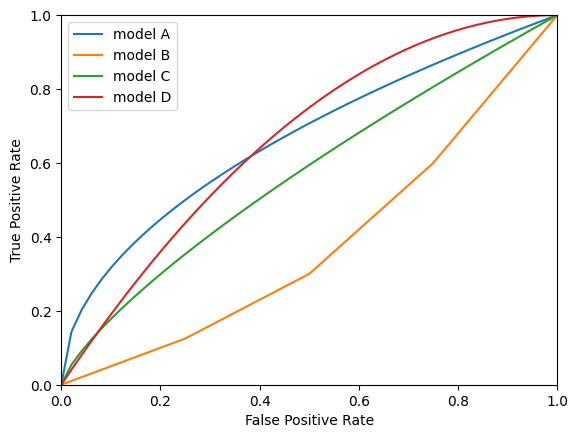

In [81]:
# DO NOT CHANGE

xs19 = np.linspace(0, 1)
plt.plot(xs19, xs19**0.5, label="model A")
plt.plot([0, 0.25, 0.5, 0.75, 1.00], [0.00, 0.125, 0.3, 0.6, 1.0], label="model B")
plt.plot(xs19, xs19**0.75, label="model C")
plt.plot(xs19, 1 - (1-xs19)**2, label="model D")

plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

None

In [82]:
# YOUR CHANGES HERE

p19 = "b"

In [83]:
p19

'b'

### Problem 20

You are hired as a consultant by a company that needs help evaluating one of their new models.
Unfortunately, they are being very secretive and not even sharing much data with each other.
The data scientist behind the new model provides the residuals for a sample of their model's output.
Another employee at the company points out that the sample residuals have a mean higher than 0.03, so the model must be biased high.
For the purposes of this problem, consider the model to be biased high if its average residual is positive with statistical significance.
You step in to mediate this dispute, and propose using Student's one-sided $t$-test on the residuals to decide if the model has biased high.
Set `p20` to the $t$-statistic for this sample.


In [84]:
# DO NOT CHANGE

q20 = np.array([ 0.15882512, -0.04427525, -0.00195684,  0.2083716 ,  0.07146777,
       -0.1219863 , -0.11263558,  0.23530471, -0.25162889,  0.19274179])

In [129]:
# YOUR CHANGES HERE

target_mean = 0
t_stat, p_value = stats.ttest_1samp(q20, target_mean)

p20 = t_stat

In [130]:
p20

np.float64(0.6367728838002948)

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

Problem 3
* I learned about the Central Limit Theorem how asymptotic behavior relates and the 4 formulas to know for calculating CLT.
* https://chatgpt.com/share/68e1a824-567c-800d-9227-53c5de1d271a

Problem 16
* I was confused and didn't realize I had to run 10,000 times for each 1,000 time. I learned that I can use .mean() as a substitution for count/len for True/False values only when finding sample probability.
* https://chatgpt.com/share/68e530e6-c298-800d-947c-24931981f353

Problem 17
* I knew how to solve the first part, but didn't understand how to find the value of pie given the estimate. I learned that when I see the word estimate it can also mean the sample average, thus we can use `np.mean()`.
* https://chatgpt.com/share/68e53d3d-2388-800d-9728-f7b7f6af2c2c

Problem 20
* I was close, but initially I used the p_value and then I used the wrong target mean. I learned how to correctly identify the target mean since that is what I was ultimately confused about.
* https://chatgpt.com/share/68e90da1-b108-800d-bd3a-5718c9d17129